## Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread, imshow

## Load and show the image
&emsp; You can see there are many horizontal lines in the graph. The purpose we conduct the fourier transform is to remove the horizontal lines.

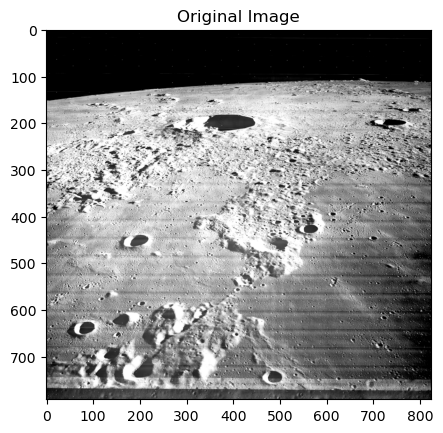

In [7]:
image = imread("lunar_obiter.avif")
plt.imshow(image)
plt.title('Original Image')
plt.show()

## Convert image to gray scale anb conduct fourier transform

In [22]:
gray_image = rgb2gray(image)
f_image = np.fft.fft2(gray_image)

# low frequency - smooth, high frequency - details, zero frequency - average brightness
# np.fft.fftshift() - Shift the zero-frequency component to the center of the spectrum

fshift = np.fft.fftshift(f_image)

## Visualize fourier transform image after shifting

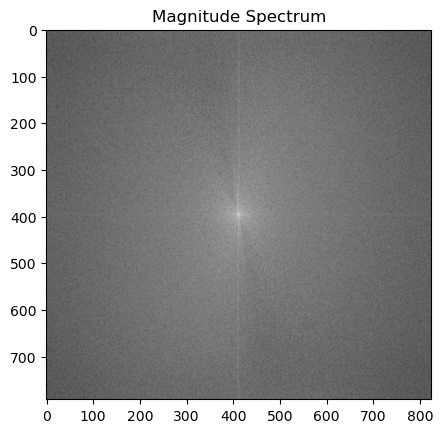

In [27]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
# plt.axis('off')
plt.show()

## Add filter to remove noises

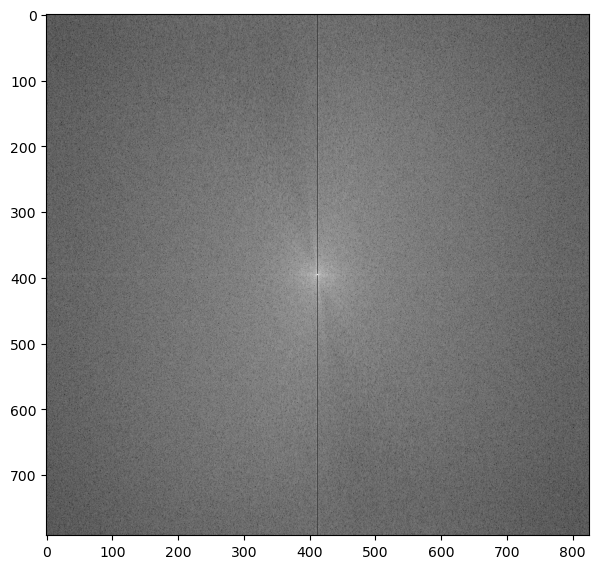

In [57]:
image_gray_fft2 = fshift.copy()
pos_zero_frequency_x = fshift.shape[0]/2 - 1        # bypass zero frequency, otherwise it will change the brightness of the figure
pos_zero_frequency_x = int(pos_zero_frequency_x)    # convert to integer
pos_zero_frequency_y = int(fshift.shape[1]/2)

image_gray_fft2[:pos_zero_frequency_x, pos_zero_frequency_y] = 1
image_gray_fft2[-pos_zero_frequency_x:, pos_zero_frequency_y] = 1

plt.figure(figsize=(7,7))
plt.imshow(np.log(abs(image_gray_fft2)), cmap='gray')

## Invert fourier transform to normal graph 

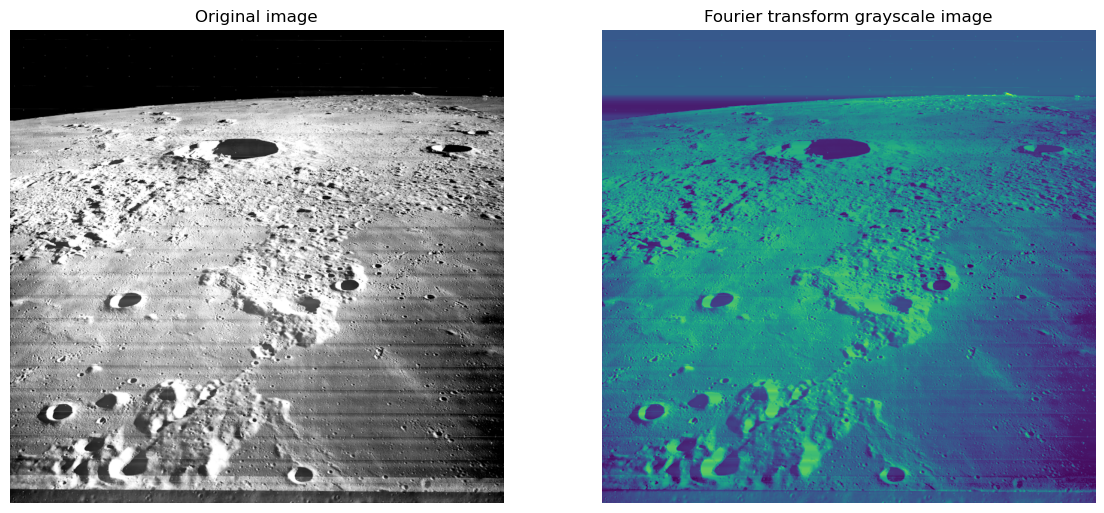

In [58]:
inv_fshift = np.fft.ifftshift(image_gray_fft2)      # shift back to origin
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = abs(filtered_gray_image)

fig, ax = plt.subplots(1, 2, figsize = (14, 7))
ax[0].imshow(image)
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(filtered_gray_image)
ax[1].set_title('Fourier transform grayscale image')
ax[1].axis('off')

plt.show()

## Apply to RGB tunnels

In [71]:
transformation_channels = []
for i in range(3):
    rgb_fft = np.fft.fft2(image[:, :, i])
    rgb_fft = np.fft.fftshift(rgb_fft)          # zero frequency shifting
    rgb_fft2 = rgb_fft.copy()

    # apply same filters as before
    pos_zero_frequency_x = rgb_fft2.shape[0]/2 - 1        # bypass zero frequency, otherwise it will change the brightness of the figure
    pos_zero_frequency_x = int(pos_zero_frequency_x)    # convert to integer
    pos_zero_frequency_y = int(rgb_fft2.shape[1]/2)
    rgb_fft2[:pos_zero_frequency_x, pos_zero_frequency_y] = 1
    rgb_fft2[-pos_zero_frequency_x:, pos_zero_frequency_y] = 1
    transformation_channels.append(abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))

# print(transformation_channels)

In [75]:
filtered_rgb_image = np.dstack([transformation_channels[0], transformation_channels[1], transformation_channels[2]])    # stacking 3 channels into 3d array
print(filtered_rgb_image.shape)
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

(792, 825, 3)


## Plot the image 

In [78]:
image.shape

(792, 825, 3)

In [80]:
def plot_image(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)

    # convert the image to grayscale
    gray_image = rgb2gray(image[:, :, :3])

    # Calculate the 2D Fourier transform and shift to zero frequency
    f_image = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f_image)
    magnitude_spectrum = 20 * np.log(abs(fshift))

    # Plot the images 
    fig, ax = plt.subplots(2, 3, figsize=(14, 10))
    
    ax[0, 0].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 0].set_title('Magnitude Spectrum')

    ax[0, 1].imshow(np.log(abs(image_gray_fft2)), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum with filter')

    ax[0, 2].imshow(gray_image, cmap='gray')
    ax[0, 2].set_title('Gray image')

    ax[1, 0].imshow(image)
    ax[1, 0].set_title('Original image')

    ax[1, 1].imshow(filtered_gray_image, cmap='gray')
    ax[1, 1].set_title('Filtered Fourier gray image') 
    ax[1, 1].set_axis_off()

    ax[1, 2].imshow(filtered_rgb_image)
    ax[1, 2].set_title('Filtered Fourier RGB image')
    ax[1, 2].set_axis_off()

    # save the figure
    plt.savefig('filtered_rgb_image.png', dpi=300)
    plt.show() 

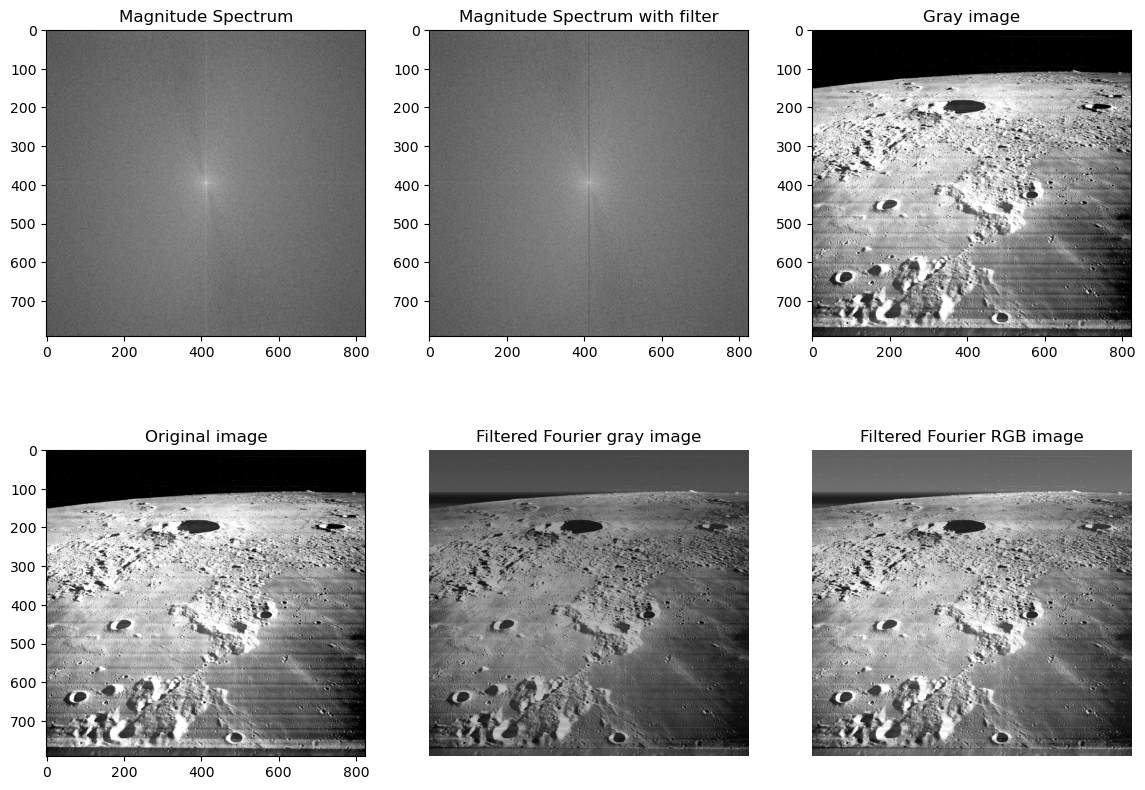

In [81]:
plot_image(image, filtered_gray_image, filtered_rgb_image)